In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import RandomAugMix 
print(tf.__version__)

2021-11-03 07:33:44.392730: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


In [2]:
#Check if GPU is available
tf.config.list_physical_devices('GPU')

2021-11-03 07:33:45.524991: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-03 07:33:45.525434: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-03 07:33:45.568495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 07:33:45.568834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-11-03 07:33:45.568875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

ary libcusolver.so.10
2021-11-03 07:33:45.572941: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.10
2021-11-03 07:33:45.575103: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-11-03 07:33:45.575168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 07:33:45.575523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 07:33:45.576009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 07:33:45.576338: I 

In [3]:

CLASSES=["fabric", "foliage", "glass", "leather", "metal", "paper", "plastic", "stone", "water", "wood"]

##  Dataset Preparation

Split the dataset ....

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
RAM = RandomAugMix(severity=3, width=3, alpha=1., p=1.)


def augmix(x):
     return RAM.apply(x)
    
def AugMix():
  return layers.Lambda(lambda x: augmix(x))

# prefetch the dataset
#https://www.tensorflow.org/tutorials/load_data/images
def configure_for_performance(ds,batch_size):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.map(lambda img, label: (augmix(img), label), num_parallel_calls=AUTOTUNE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds



def getFMDdataset(image_dir,batch_size=8,img_size=(224,224)):
    CLASSES=["fabric", "foliage", "glass", "leather", "metal", "paper", "plastic", "stone", "water", "wood"]


    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                class_names=CLASSES,
                                                                shuffle=True,
                                                                batch_size=batch_size,
                                                                image_size=img_size,
                                                                seed=0,
                                                                validation_split=0.2,
                                                                subset="training",
                                                                interpolation='lanczos3',
                                                                #crop_to_aspect_ratio=True,
                                                               )
    val_dataset = tf.keras.preprocessing.image_dataset_from_directory( image_dir,
                                                                class_names=CLASSES,
                                                                shuffle=True,
                                                                batch_size=batch_size,
                                                                image_size=img_size,
                                                                seed=0,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                interpolation='lanczos3',
                                                                #crop_to_aspect_ratio=True,
                                                               )
    train_dataset=configure_for_performance(train_dataset,batch_size)
    val_dataset=configure_for_performance(val_dataset,batch_size)

    return train_dataset,val_dataset

In [14]:

train_dataset,val_dataset= getFMDdataset("../dataset/FMD/image",8,(224,224))

Found 1000 files belonging to 10 classes.
Using 800 files for training.
Found 1000 files belonging to 10 classes.
Using 200 files for validation.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
<class 'tensorflow.python.framework.ops.Tensor'>


AttributeError: in user code:

    /tmp/ipykernel_13783/179335714.py:16 None  *
        lambda img, label: (augmix(img), label)
    /tmp/ipykernel_13783/179335714.py:6 augmix  *
        return RAM.apply(x)
    /mnt/local/kennyvoo/Material-Recognition/model/RandomAugMix.py:17 apply  *
        image = augment_and_mix(
    /tmp/ipykernel_13783/2221845264.py:50 augment_and_mix  **
        image_aug = apply_op(image_aug, op, severity)
    /tmp/ipykernel_13783/2221845264.py:188 apply_op
        pil_img = Image.fromarray(image)  # Convert to PIL.Image
    /home/kennyvoo/anaconda3/envs/nn2/lib/python3.8/site-packages/PIL/Image.py:2825 fromarray
        arr = obj.__array_interface__

    AttributeError: 'Tensor' object has no attribute '__array_interface__'


In [94]:
np.__version__

'1.19.5'

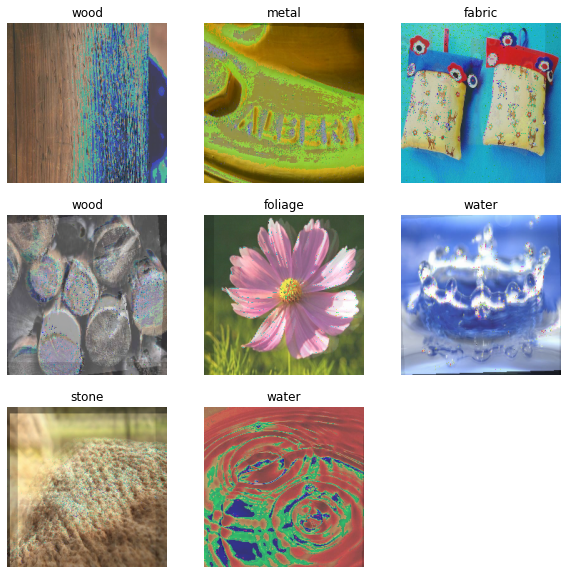

In [51]:
#visualize the dataset to ensure correctness
class_names = CLASSES
batch_size= 8
plt.figure(figsize=(10, 10))
RAM = RandomAugMix.RandomAugMix(severity=3, width=3, alpha=1., p=1.)

for images, labels in train_dataset.take(1):
  for i in range(batch_size):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow( RAM.apply(images[i].numpy().astype("uint8")).astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model


In [42]:
np.__version__

'1.19.5'

In [43]:
RAM = RandomAugMix.RandomAugMix(severity=3, width=3, alpha=1., p=1.)


def augmix(x):
     return RAM.apply(x)
    
def AugMix():
  return layers.Lambda(lambda x: augmix(x))


def resnet50():
    base_model=tf.keras.applications.ResNet50(
        include_top=False, weights='imagenet')
    base_model.trainable=False
    base_model.training=False

    model = tf.keras.Sequential([
        tf.keras.layers.Input((224, 224, 3)),

        tf.keras.layers.Lambda(lambda x: augmix(x)),
        tf.keras.layers.Lambda(tf.keras.applications.resnet.preprocess_input, name='preprocessing', input_shape=(224, 224, 3)),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10,activation="softmax")    
    ])
    model.summary()
    return model

model=resnet50()

NotImplementedError: Cannot convert a symbolic Tensor (Placeholder:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [44]:
LEARNING_RATE=0.001

model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


NameError: name 'model' is not defined

In [79]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
EARLY_STOP_PATIENCE=10
early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
model_cp = ModelCheckpoint(filepath = './weights/baseline_best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [80]:
EPOCHS=30

history = model.fit(
        train_dataset,
        epochs = EPOCHS,
        validation_data=val_dataset,
        callbacks=[model_cp, early_stopper],
        use_multiprocessing=True,
        workers=4
)

Epoch 1/30


NotImplementedError: in user code:

    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/keras/layers/core.py:917 call
        result = self.function(inputs, **kwargs)
    /tmp/ipykernel_29773/2657684817.py:8 <lambda>
        return tf.keras.layers.Lambda(lambda x: augmix(x))
    /tmp/ipykernel_29773/2657684817.py:5 augmix
        return RAM.apply(x)
    /mnt/local/kennyvoo/Material-Recognition/model/RandomAugMix.py:17 apply
        image = augment_and_mix(
    /mnt/local/kennyvoo/Material-Recognition/model/RandomAugMix.py:43 augment_and_mix
        mix = np.zeros_like(image).astype(np.float32)
    <__array_function__ internals>:5 zeros_like
        
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/numpy/core/numeric.py:137 zeros_like
        res = empty_like(a, dtype=dtype, order=order, subok=subok, shape=shape)
    <__array_function__ internals>:5 empty_like
        
    /home/kennyvoo/anaconda3/envs/nn/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:852 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (IteratorGetNext:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


## Visualize resul

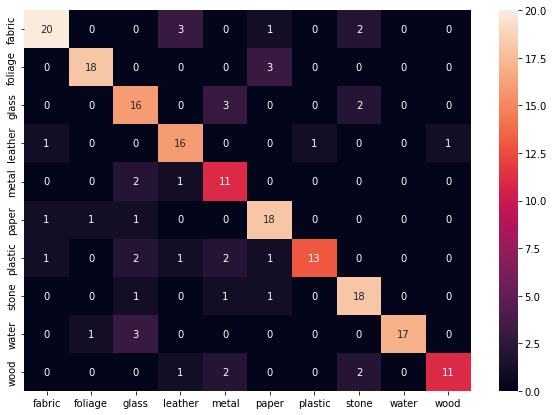

In [157]:

def plot_confusion_matrix(model,classes):
    predictions = np.array([])
    labels =  np.array([])
    for x, y in val_dataset:
      predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)],axis=None)
      labels = np.concatenate([labels, y],axis=None)

    confusion_matrix= tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

    df_cm = pd.DataFrame(confusion_matrix, index = classes,
                      columns = classes)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
plot_confusion_matrix(model,CLASSES)

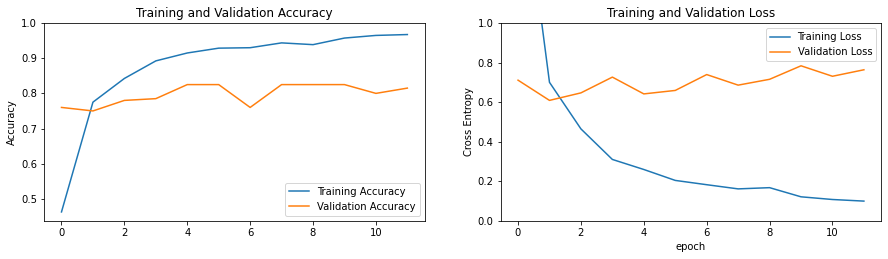

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning 

In [169]:
model.layers[1].trainable=True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers[1].layers))

# Fine-tune from this layer onwards
fine_tune_at = 150

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[1].layers[:fine_tune_at]:
  layer.trainable =  False


model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()


Number of layers in the base model:  175
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
preprocessing (Lambda)       (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20490     
Total params: 23,608,202
Trainable params: 10,010,634
Non-trainable params: 13,597,568
_________________________________________________________________


In [170]:
fine_tune_epochs = 10
initial_epochs=history.epoch[-1]
total_epochs = initial_epochs  + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=initial_epochs,
                         validation_data=val_dataset)

Epoch 12/21
200/200 [==============================] - 11s 16ms/step - loss: 0.7124 - accuracy: 0.7624 - val_loss: 1.0885 - val_accuracy: 0.7450
Epoch 13/21
200/200 [==============================] - 3s 15ms/step - loss: 0.1371 - accuracy: 0.9504 - val_loss: 0.9512 - val_accuracy: 0.7600
Epoch 14/21
200/200 [==============================] - 3s 14ms/step - loss: 0.0553 - accuracy: 0.9892 - val_loss: 0.8151 - val_accuracy: 0.7800
Epoch 15/21
200/200 [==============================] - 3s 17ms/step - loss: 0.0235 - accuracy: 0.9975 - val_loss: 0.7582 - val_accuracy: 0.8100
Epoch 16/21
200/200 [==============================] - 3s 16ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.7956 - val_accuracy: 0.7900
Epoch 17/21
200/200 [==============================] - 3s 17ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.7723 - val_accuracy: 0.8050
Epoch 18/21
200/200 [==============================] - 3s 15ms/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.7951 - val_accuracy

In [171]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

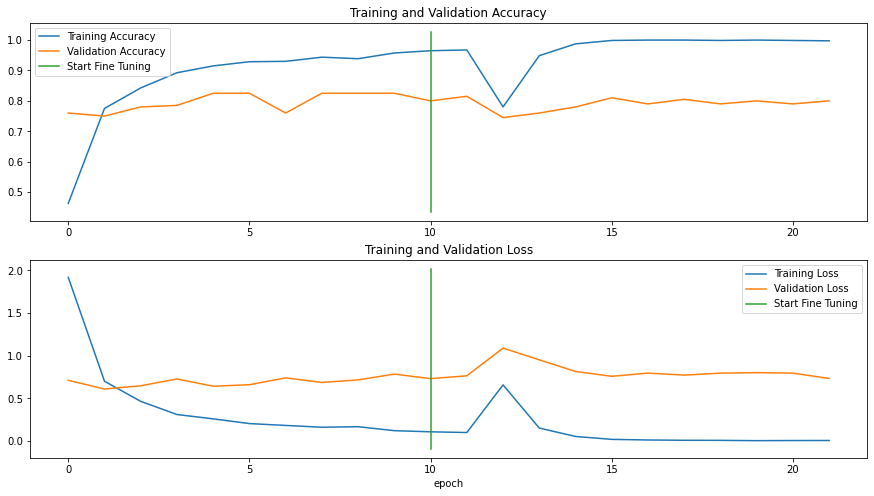

In [172]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()